In [21]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [22]:
data= pd.read_csv('/content/drive/MyDrive/DataSet/Main.csv')
df = pd.DataFrame(data)
df.head()

,Index,Review
0,1,"I admit, the great majority of films released ..."
1,2,Story of a man who has unnatural feelings for ...
2,3,Bromwell High is a cartoon comedy. It ran at t...
3,4,"Take a low budget, inexperienced actors doubli..."
4,5,Airport '77 starts as a brand new luxury 747 p...


In [23]:
df.isna().sum()

Index     0
Review    0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Index   75000 non-null  int64 
 1   Review  75000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


# Preprocessing


* Expand Contraction

In [26]:
def expand_contraction(phrase):
  # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"There\'s", "there is", phrase)


    # general
    phrase = re.sub(r"<br /><br />", " ", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df['Review']=df['Review'].apply(expand_contraction)
df.head()

,Index,Review
0,1,"I admit, the great majority of films released ..."
1,2,Story of a man who has unnatural feelings for ...
2,3,Bromwell High is a cartoon comedy. It ran at t...
3,4,"Take a low budget, inexperienced actors doubli..."
4,5,Airport '77 starts as a brand new luxury 747 p...


* Lower case + Remove Punctation & Remove words and digits containing digits

In [27]:
def punct(text):
  text = re.sub('[^\w\s]','',text)
  text= "".join(text)
  text= re.sub("\d+", "", text)
  text = re.sub('^\t','',text)

  return text
df.Review = df['Review'].str.lower()
df.Review = df['Review'].apply(punct)
df.head()

,Index,Review
0,1,i admit the great majority of films released b...
1,2,story of a man who has unnatural feelings for ...
2,3,bromwell high is a cartoon comedy it ran at th...
3,4,take a low budget inexperienced actors doublin...
4,5,airport starts as a brand new luxury plane i...


* Remove Extra Space

In [28]:
df['Review'] = df['Review'].apply(lambda text: re.sub(' +', ' ', text))

* Rephrase text - to remove Urls, email like patterns

In [29]:
#email-id
df['Review'] = df['Review'].apply(lambda x: re.sub('\S*@\S*\s?', 'emailid',x))
#url
df['Review'] = df['Review'].apply(lambda x: re.sub('(http[s]?S+)|(w+.[A-Za-z]{2,4}S*)', 'urladdress', x))

* Remove Stopwords

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_word = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
def stop(text):
  text = [word for word in text.split(' ') if word not in stop_word]
  return text

df['Review'] = df['Review'].apply(stop)

Stemming and Lemmatization

In [35]:
# Lemmatization (over stemming) for more efficency
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [36]:
def lemmati(text):
  text = [lemma.lemmatize(word) for word in text]
  return text

df['Review'] = df['Review'].apply(lemmati)

In [37]:
df.head()

,Index,Review
0,1,"[admit, great, majority, film, released, say, ..."
1,2,"[story, man, unnatural, feeling, pig, start, u..."
2,3,"[bromurladdress, high, cartoon, comedy, ran, t..."
3,4,"[take, lourladdresset, inexperienced, actor, d..."
4,5,"[airport, start, brand, neurladdressry, plane,..."


* List of words to sentence

In [38]:
df['Review']= [' '.join(i) for i in df['Review']]

In [39]:
df.head()

,Index,Review
0,1,admit great majority film released say dozen m...
1,2,story man unnatural feeling pig start urladdre...
2,3,bromurladdress high cartoon comedy ran time pr...
3,4,take lourladdresset inexperienced actor doubli...
4,5,airport start brand neurladdressry plane loade...


#EDA

Tokenization

In [41]:
# word tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df['Tokenized'] = df.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Index,Review,Tokenized
0,1,admit great majority film released say dozen m...,"[admit, great, majority, film, released, say, ..."
1,2,story man unnatural feeling pig start urladdre...,"[story, man, unnatural, feeling, pig, start, u..."
2,3,bromurladdress high cartoon comedy ran time pr...,"[bromurladdress, high, cartoon, comedy, ran, t..."
3,4,take lourladdresset inexperienced actor doubli...,"[take, lourladdresset, inexperienced, actor, d..."
4,5,airport start brand neurladdressry plane loade...,"[airport, start, brand, neurladdressry, plane,..."


In [43]:
from nltk.tokenize import sent_tokenize
df['Character Count'] = df['Review'].str.len()
df['Word Count'] = df['Tokenized'].str.len()
df['Mean Word Length'] = df.apply(lambda row: row['Character Count'] / row['Word Count'] if row['Word Count'] > 0 else 0, axis=1)

df['Sentence Count'] = df['Review'].apply(lambda x: len(sent_tokenize(x)))
df['Mean Sentence Length'] = df.apply(lambda row: row['Word Count'] / row['Sentence Count'] if row['Sentence Count'] > 0 else 0, axis=1)

In [45]:
df.head()

,Index,Review,Tokenized,Character Count,Word Count,Mean Word Length,Sentence Count,Mean Sentence Length
0,1,admit great majority film released say dozen m...,"[admit, great, majority, film, released, say, ...",495,73,6.780822,1,73.0
1,2,story man unnatural feeling pig start urladdre...,"[story, man, unnatural, feeling, pig, start, u...",500,66,7.575758,1,66.0
2,3,bromurladdress high cartoon comedy ran time pr...,"[bromurladdress, high, cartoon, comedy, ran, t...",573,72,7.958333,1,72.0
3,4,take lourladdresset inexperienced actor doubli...,"[take, lourladdresset, inexperienced, actor, d...",628,85,7.388235,1,85.0
4,5,airport start brand neurladdressry plane loade...,"[airport, start, brand, neurladdressry, plane,...",3264,447,7.302013,1,447.0


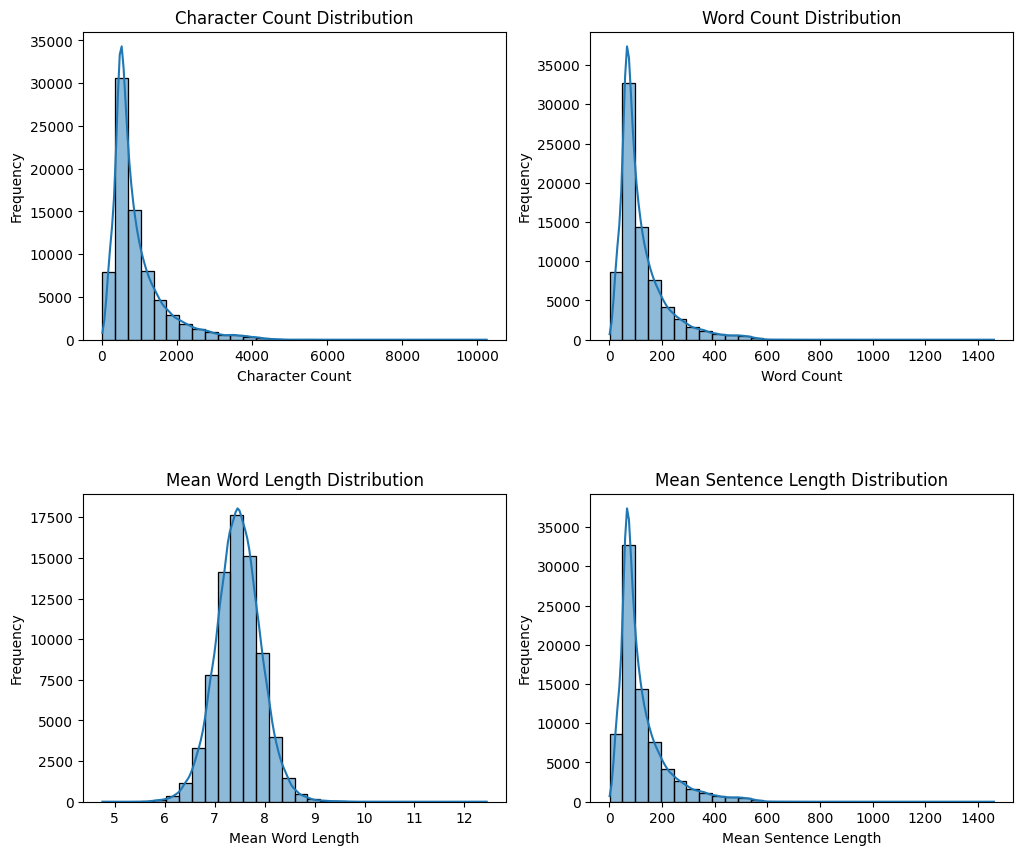

In [46]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)


# Character count
sns.histplot(df['Character Count'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Character Count Distribution')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')

# Word Count
sns.histplot(df['Word Count'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')

# Mean Word Length
sns.histplot(df['Mean Word Length'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Mean Word Length Distribution')
axes[1, 0].set_xlabel('Mean Word Length')
axes[1, 0].set_ylabel('Frequency')

# Mean Sentence Length
sns.histplot(df['Mean Sentence Length'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Mean Sentence Length Distribution')
axes[1, 1].set_xlabel('Mean Sentence Length')
axes[1, 1].set_ylabel('Frequency')

plt.show()